# GloVe Embeddings
---

### Loading essential packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk

from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import Word2Vec, KeyedVectors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot

### Coverting Glove to Word2Vec

In [2]:
glove_input_file = 'vectors.txt'
word2vec_output_file = 'word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)

(14775, 100)

In [3]:
model_glove = KeyedVectors.load_word2vec_format(word2vec_output_file)

### PCA Visulisation plot for complete embedding

<ipython-input-4-9ce5c183ebb4>:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  X = model_glove[model_glove.wv.vocab]
<ipython-input-4-9ce5c183ebb4>:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  words = list(model_glove.wv.vocab)


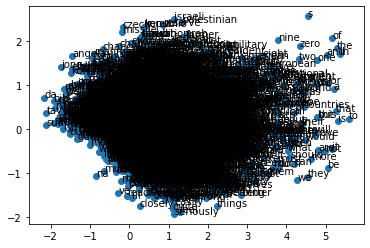

In [4]:
# fit a 2d PCA model to the vectors
X = model_glove[model_glove.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_glove.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

### t-SNE Visulisation plot for complete embedding

<ipython-input-5-1f6b6662ad99>:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  X = model[model.wv.vocab]
<ipython-input-5-1f6b6662ad99>:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  words = list(model.wv.vocab)


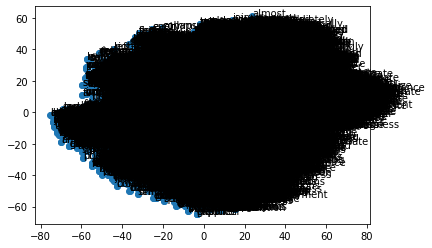

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

def tsneGraph(model):
  X = model[model.wv.vocab]
  tsne = TSNE(n_components=2)
  result = tsne.fit_transform(X)

  # create a scatter plot of the projection
  plt.scatter(result[:, 0], result[:, 1])
  words = list(model.wv.vocab)
  for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
  plt.show()

tsneGraph(model_glove)

### Example word: 'wonderful'

In [9]:
model_glove.most_similar('wonderful')

[('tricky', 0.7384306788444519),
 ('prerequisite', 0.7165414094924927),
 ('scapegoat', 0.7130537033081055),
 ('satisfactory', 0.693198561668396),
 ('handicap', 0.685788631439209),
 ('gateway', 0.6679108738899231),
 ('sobering', 0.6674046516418457),
 ('precondition', 0.6557587385177612),
 ('workable', 0.6542050838470459),
 ('monument', 0.648287296295166)]

<ipython-input-10-334d7d75ec02>:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  wrd_vector = model.wv.__getitem__([wrd_score[0]])


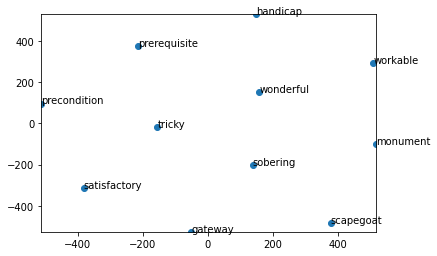

In [10]:
def display_closestwords_tsnescatterplot(model, word, size):
  arr = np.empty((0,size), dtype='f')
  word_labels = [word]

  close_words = model.similar_by_word(word)
  arr = np.append(arr, np.array([model[word]]), axis=0)
  for wrd_score in close_words:
    wrd_vector = model.wv.__getitem__([wrd_score[0]])
    word_labels.append(wrd_score[0])
    arr = np.append(arr, wrd_vector, axis=0)

  tsne = TSNE(n_components = 2, random_state=0)
  np.set_printoptions(suppress=True)
  Y = tsne.fit_transform(arr)

  x_coords = Y[:, 0]
  y_coords = Y[:, 1]
  plt.scatter(x_coords, y_coords)

  for label, x, y in zip(word_labels, x_coords, y_coords):
    plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords='offset points')

  plt.xlim(x_coords.min()+0.00005,x_coords.max()+0.00005 )
  plt.ylim(y_coords.min()+0.00005,y_coords.max()+0.00005 )
  plt.show()

display_closestwords_tsnescatterplot(model_glove, 'wonderful', 100)

### Saving the model

In [8]:
# model_glove.save('model_glove.dat')